# 1. Dataset Preparation 

In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [ ]:
path = "../input/"

In [5]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [6]:
def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [7]:
def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [8]:
def gp(col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2

# 2.EDA of Application Train

#2.1 Extract of Application Train

In [13]:
app_train = pd.read_csv(r"C:\Users\User\Desktop\home-credit-default-risk\application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.

#2.2 Distribution of Target Variable 

In [14]:
# Target Variable Distribution 
bar_hor(app_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

The target variable is slightly imbalance with the majority of loans has the target equals to 0 which indicates that individuals did not had any problems in paying installments in given time. There are about 91% loans which is equal to about 282K with target = 0, While only 9% of the total loans (about 24K applicants) in this dataset involved the applicants having problems in repaying the loan / making installments.

#2.3 Gender Type of Applicants

In [15]:
tr0 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In the applicant's data women have applied for a larger majority of loans which is almost the double as the men. In total, there are about 202,448 loan applications filed by females in contrast to about 105,059 applications filed by males. However, a larger percentage (about 10% of the total) of men had the problems in paying the loan or making installments within time as compared to women applicants (about 7%).

#2.4 Family Status of Applicants 

In [16]:
tr0 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

Married people have applied for a larger number of loan applications about 196K, However, people having Civil Marriage has the highest percentage (about 10%) of loan problems and challenges.

2.5. Applicants own Real Estate or Car ?

In [20]:
## real estate 
t = app_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
colors = ['#96D38C','#FEBFB3']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Real Estate', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


t = app_train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Car', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


tr1, tr2 = gp('FLAG_OWN_REALTY', 'Applicants Owning Real Estate wrt Target Variable')
tr3, tr4 = gp('FLAG_OWN_CAR', 'Applicants Owning Car wrt Target Variable')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["% Applicants with RealEstate and Target = 1", "% Applicants with Car and Target = 1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

About 70% of the applicants own Real Estate, while only 34% of applicants own Car who had applied for the loan in the past years. However, a higher percentage of people having payment difficulties was observed with applicants which did not owned Car or which did not owned Real Estate.

#2.6 Suite Type and Income Type of Applicants 

In [21]:
tr0 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

Top 3 Type Suites which applies for loan are the houses which are:
    - Unaccompanined (about 248K applicants) 
    - Family (about 40K applicants)  
    - Spouse, partner (about 11K applicants)

The income type of people who applies for loan include about 8 categroes, top ones are :
    - Working Class (158K)
    - Commercial Associate (71K)
    - Pensiner (55K)

#2.6.1 How does Target Varies with Suite and Income Type of Applicants

In [22]:
tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

We see that Applicants having Income Types : Maternity Leaves and UnEmployed has the highest percentage (about 40% and 36% approx) of Target = 1 ie. having more payment problems, while Pensioners have the least (about 5.3%).

#2.7. Applicant's Contract Type

In [24]:
t = app_train['NAME_CONTRACT_TYPE'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Contract Type', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Cash loans with about 278K loans contributes to a majorty of total lonas in this dataset. Revolving loans has significantly lesser number equal to about 29K as compared to Cash loans.

#2.8 Education Type and Housing Type 

In [25]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Education Type', 'Applicants Housing Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_EDUCATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Education Types, Target=1", "Applicants Housing Type, Target=1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

A large number of applications (218K) are filed by people having secondary education followed by people with Higher Education with 75K applications. Applicants living in House / apartments has the highest number of loan apllications equal to 272K. While we see that the applicants with Lower Secondary education status has the highest percentage of payment related problems. Also, Applicants living in apartments or living with parents also shows the same trend.

#2.9. Which Organization and Occupation Type applies for loan and which repays 

In [26]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Organization Type', 'Applicants Occupation Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=150));
iplot(fig);

Top Applicant's who applied for loan : Laborers - Approx 55 K, Sales Staff - Approx 32 K, Core staff - Approx 28 K. Entity Type 3 type organizations have filed maximum number of loans equal to approx 67K

#2.9.1 Target Variable with respect to Organization and Occupation Type 

In [27]:
tr1, tr2 = gp('ORGANIZATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('OCCUPATION_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Organization Types - Repayed", "Applicants Occupation Type - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

#2.10 Walls Material, Foundation, and House Type 

In [28]:
tr1 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr1 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = [ 'House Type', 'Walls Material'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
# fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

"Blocks and Flats" related house types have filed the largest number of loan applications equal to about 150K, rest of the other categories : Specific Housing and Terraced house have less than 1500 applications. Similarly houses having Panel and Stone Brick type walls material have filed the largest applciations close to 120K combined.

#2.10.1 Target Variable with respect to Walls Material, Fondkappremont, House Type 

In [29]:
tr1, tr2 = gp('HOUSETYPE_MODE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('WALLSMATERIAL_MODE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ["HouseTypes - Repayed", "WallsMaterial - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

#2.11. Distribution of Amount Credit 

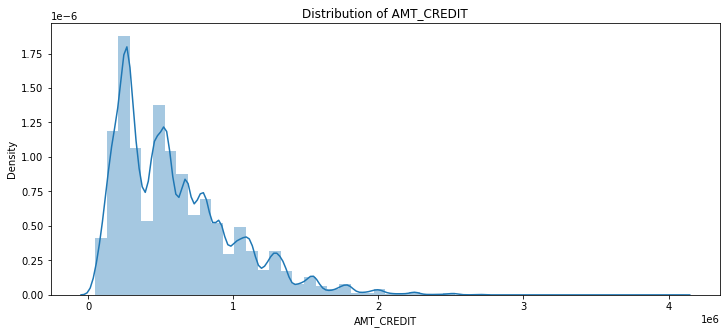

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

2.12 Distribution of Amount AMT_ANNUITY

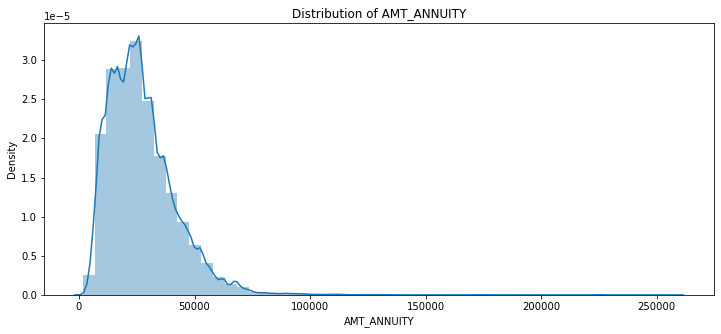

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())

#2.13 Distribution of Amount AMT_GOODS_PRICE 

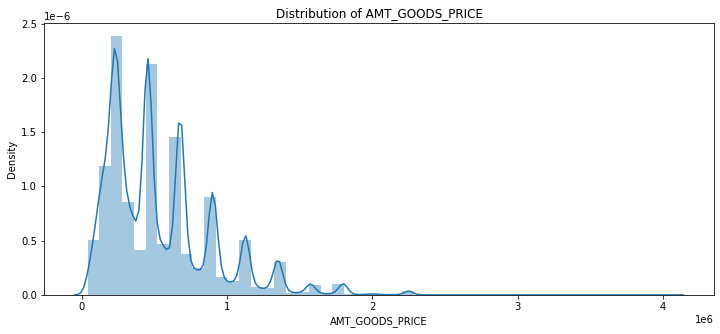

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())

#2.14 Distribution of Amount REGION_POPULATION_RELATIVE 

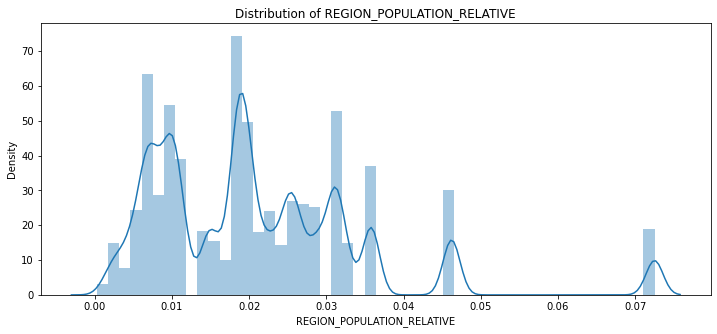

In [33]:
plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

#2.15 Distribution of Amount DAYS_BIRTH 

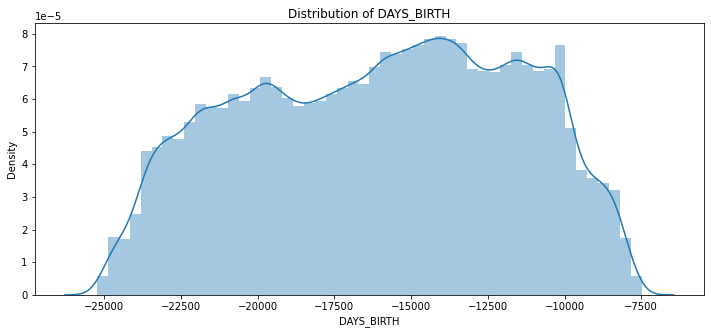

In [35]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(app_train["DAYS_BIRTH"])

#2.16 Distribution of Amount DAYS_EMPLOYED 

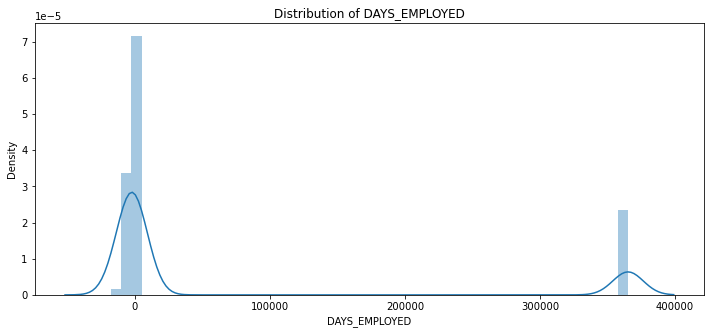

In [36]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

#2.17 Distribution of Number of Days for Registration

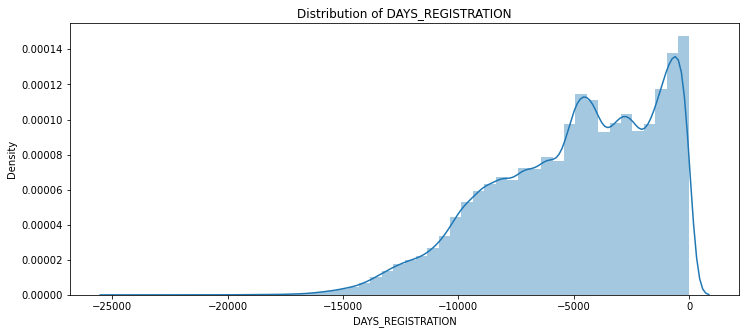

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(app_train["DAYS_REGISTRATION"])

#2.18 How many Family Members does the applicants has 

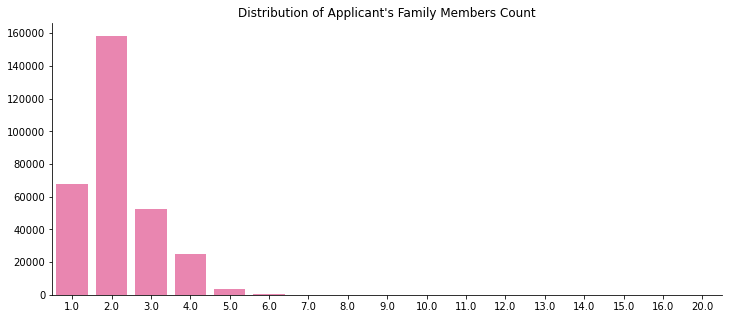

In [38]:
t = app_train["CNT_FAM_MEMBERS"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Family Members Count");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

Most of the applicants who applied for loan had 2 family members in total

#2.19 How many Children does the applicants have 

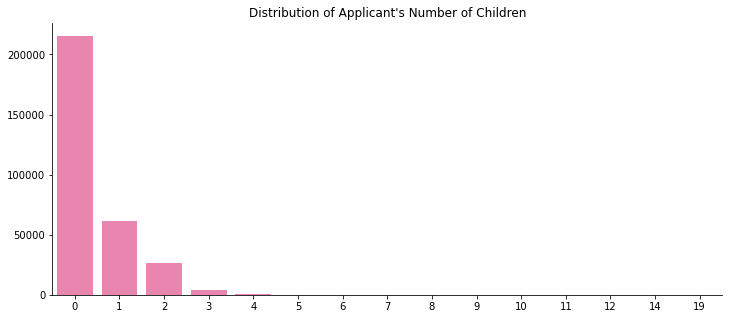

In [39]:
t = app_train["CNT_CHILDREN"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Number of Children");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

# 3 Baseline Model 

#3.1 Dataset Preparation

In [41]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = pd.read_csv(r'C:\Users\User\Desktop\home-credit-default-risk\application_test.csv')

app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

#3.2 Handelling Categorical Features

In [45]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
previous_application = pd.read_csv(r"C:\Users\User\Desktop\home-credit-default-risk\previous_application.csv")
prev_app_cats = _get_categorical_features(previous_application)
bureau = pd.read_csv(r"C:\Users\User\Desktop\home-credit-default-risk\bureau.csv")
bureau_cats = _get_categorical_features(bureau)
pcb = pd.read_csv(r"C:\Users\User\Desktop\home-credit-default-risk\POS_CASH_balance.csv")
pcb_cats = _get_categorical_features(pcb)
credit_card_balance = pd.read_csv(r"C:\Users\User\Desktop\home-credit-default-risk\credit_card_balance.csv")
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

#3.3 Prepare Final Train and Test data

In [46]:
#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

#3.4 Create Validation Sets

In [47]:
x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

#3.5 Fit the Model

In [48]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 150 rounds
[200]	valid_0's auc: 0.744853
[400]	valid_0's auc: 0.752454
[600]	valid_0's auc: 0.755987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1600]	valid_0's auc: 0.758869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1452]	valid_0's auc: 0.758922


#3.6 Feature Importance 

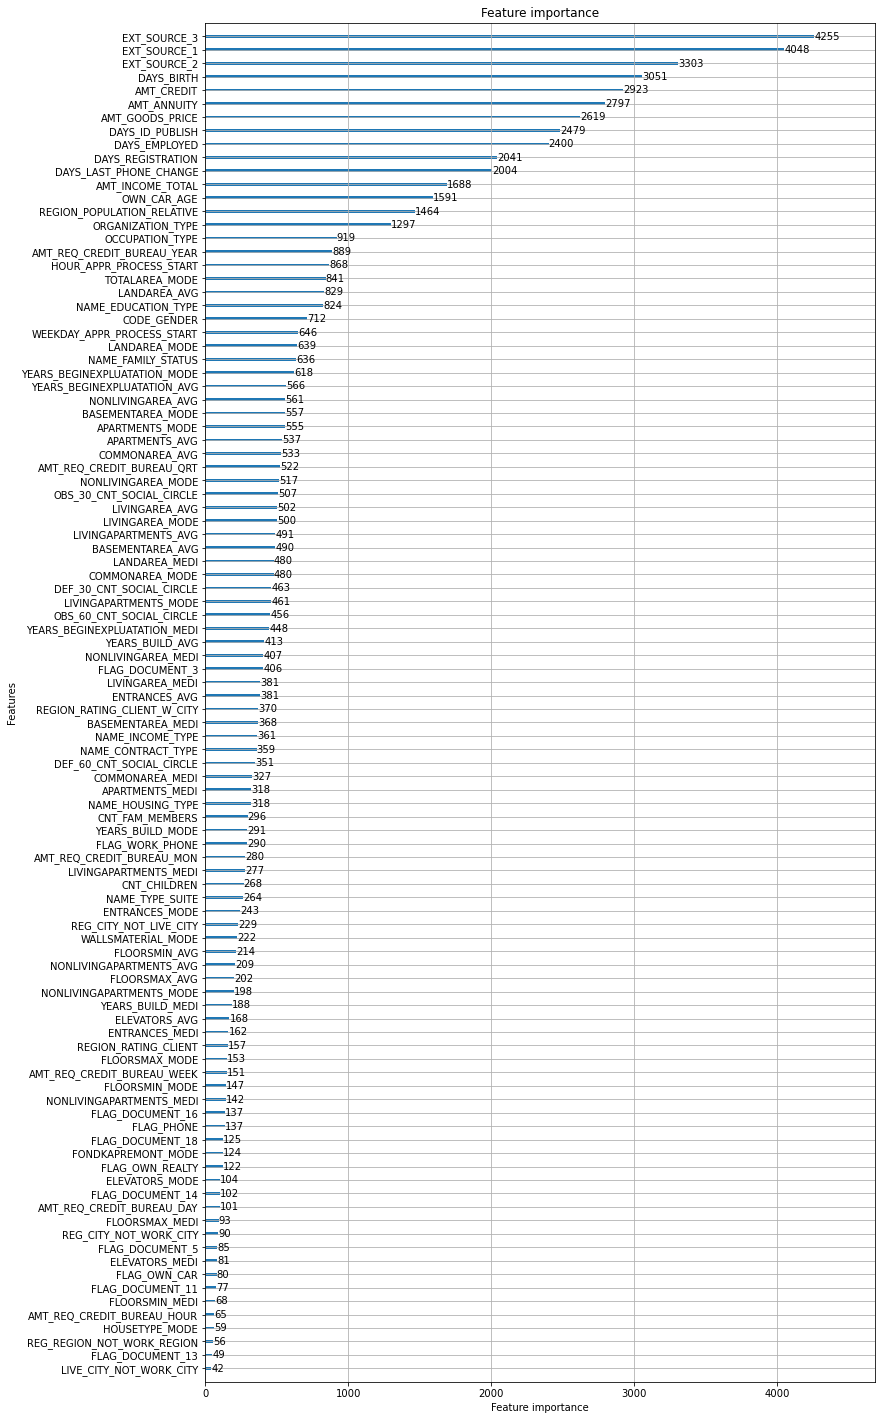

In [49]:
lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);

#3.7 Predict

In [51]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.026238
1,100005,0.113712
2,100013,0.016420
3,100028,0.040243
4,100038,0.164539
